Books recommender System using clustering | Collaborative Based 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analyzing Data

In [45]:
books = pd.read_csv(r'C:\Users\Manamnath tiwari\OneDrive\Desktop\DataScience\Projects\Recommender System\Projects\Book Recommender System\data\BX-Books.csv', 
                    sep=";", on_bad_lines='skip', encoding='latin-1')



C:\Users\Manamnath tiwari\AppData\Local\Temp\ipykernel_10140\188770499.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\Manamnath tiwari\OneDrive\Desktop\DataScience\Projects\Recommender System\Projects\Book Recommender System\data\BX-Books.csv',


In [46]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [47]:
books.shape

(271360, 8)

In [48]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [49]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S']]

In [50]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [51]:
books.rename(columns={
    "Book-Title":"title",
    "Book-Author":"author",
    "Year-Of-Publication":"year",
    "Publisher":"publisher",
    "Image-URL-S":"img_url"
},inplace= True)

In [52]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [54]:
users = pd.read_csv(r'C:\Users\Manamnath tiwari\OneDrive\Desktop\DataScience\Projects\Recommender System\Projects\Book Recommender System\data\BX-Users.csv', 
                    sep=";", on_bad_lines='skip', encoding='latin-1')


In [55]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [56]:
users.shape

(278858, 3)

In [59]:
ratings = pd.read_csv(r'C:\Users\Manamnath tiwari\OneDrive\Desktop\DataScience\Projects\Recommender System\Projects\Book Recommender System\data\BX-Book-Ratings.csv', 
                    sep=";", on_bad_lines='skip', encoding='latin-1')


In [60]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [61]:
ratings.shape

(1149780, 3)

In [62]:

print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [63]:
ratings.rename(columns={
    "User-ID":"user_id",
    "Book-Rating":"rating"
},inplace=True)

In [64]:
ratings.head()


,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [65]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [66]:
ratings['user_id'].unique().shape

(105283,)

In [67]:
x = ratings['user_id'].value_counts() > 200


In [68]:
x[x].shape # Figuring out how many users are there who rated more than 200 

(899,)

In [69]:
y = x[x].index

In [70]:
y # y is the index of x

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [71]:
ratings = ratings[ratings['user_id'].isin(y)]

In [72]:
ratings.shape 

(526356, 3)

In [73]:
rating_with_books = ratings.merge(books,on="ISBN")

In [74]:
rating_with_books

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...


In [75]:
rating_with_books.shape

(487671, 8)

In [76]:
num_rating = rating_with_books.groupby('title')['rating'].count().reset_index()

In [77]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [78]:
num_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [79]:
num_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [80]:
final_rating = rating_with_books.merge(num_rating,on='title')

In [81]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [82]:
final_rating.shape

(487671, 9)

In [83]:
final_rating = final_rating[final_rating['num_of_rating']>=50]

In [84]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [85]:
final_rating.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
1794,238120,0316168688,0,The Dogs of Babel (Today Show Book Club #12),Carolyn Parkhurst,2003,"Little, Brown",http://images.amazon.com/images/P/0316168688.0...,55
103837,76352,0553574574,0,Beach Music,Pat Conroy,1996,Bantam Books,http://images.amazon.com/images/P/0553574574.0...,79
72043,275970,0375726403,0,Empire Falls,Richard Russo,2002,Vintage Books USA,http://images.amazon.com/images/P/0375726403.0...,104
104510,148744,0316693006,0,Four Blind Mice,James Patterson,2002,"Little, Brown",http://images.amazon.com/images/P/0316693006.0...,84
175242,204864,0449223604,0,M Is for Malice,Sue Grafton,1998,Fawcett Books,http://images.amazon.com/images/P/0449223604.0...,72
122679,155495,055321313X,0,Anne of Green Gables (Anne of Green Gables Nov...,L.M. MONTGOMERY,1982,Bantam Classics,http://images.amazon.com/images/P/055321313X.0...,90
94702,35859,0375701524,0,The Hundred Secret Senses,Amy Tan,1998,Vintage Books USA,http://images.amazon.com/images/P/0375701524.0...,129
52679,78834,0140298479,0,Bridget Jones: The Edge of Reason,Helen Fielding,2001,Penguin Books,http://images.amazon.com/images/P/0140298479.0...,73
77334,108005,0786881852,7,Don't Sweat the Small Stuff and It's All Small...,Richard Carlson,1997,Hyperion,http://images.amazon.com/images/P/0786881852.0...,90
185597,78783,0671014218,0,The Mulberry Tree,Jude Deveraux,2002,Atria Books,http://images.amazon.com/images/P/0671014218.0...,69


In [86]:
final_rating.shape

(61853, 9)

In [87]:
final_rating.drop_duplicates(['title','user_id'],inplace=True)

In [88]:
final_rating.shape

(59850, 9)

In [89]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


Pivot Table

In [90]:
book_pivot = final_rating.pivot_table(columns="user_id",index="title",values='rating')

In [91]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [92]:
book_pivot.shape

(742, 888)

In [93]:
book_pivot.fillna(0,inplace=True)

In [94]:
book_pivot


user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
from scipy.sparse import csr_matrix

In [96]:
book_sparse = csr_matrix(book_pivot)

In [97]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [98]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')


In [99]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [100]:
distance , suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [101]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [102]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [103]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [104]:
book_pivot.index[3]

'4 Blondes'

In [105]:
books_name = book_pivot.index

In [106]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs('artificats', exist_ok=True)

pickle.dump(model,open('artificats/model.pkl','wb'))
pickle.dump(books_name,open('artificats/books_name.pkl','wb'))
pickle.dump(final_rating,open('artificats/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artificats/book_pivot.pkl','wb'))

In [107]:
def recommend_book(books_name):
    book_id = np.where(book_pivot.index == books_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)
    

In [108]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [109]:
bookss_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommend_book(bookss_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall


Visualization


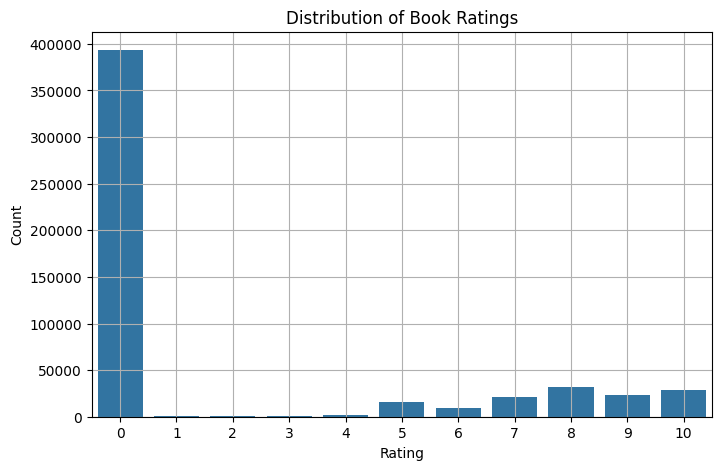

In [110]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


C:\Users\Manamnath tiwari\AppData\Local\Temp\ipykernel_10140\3506463965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_books.index, x=top_books.values, palette='mako')


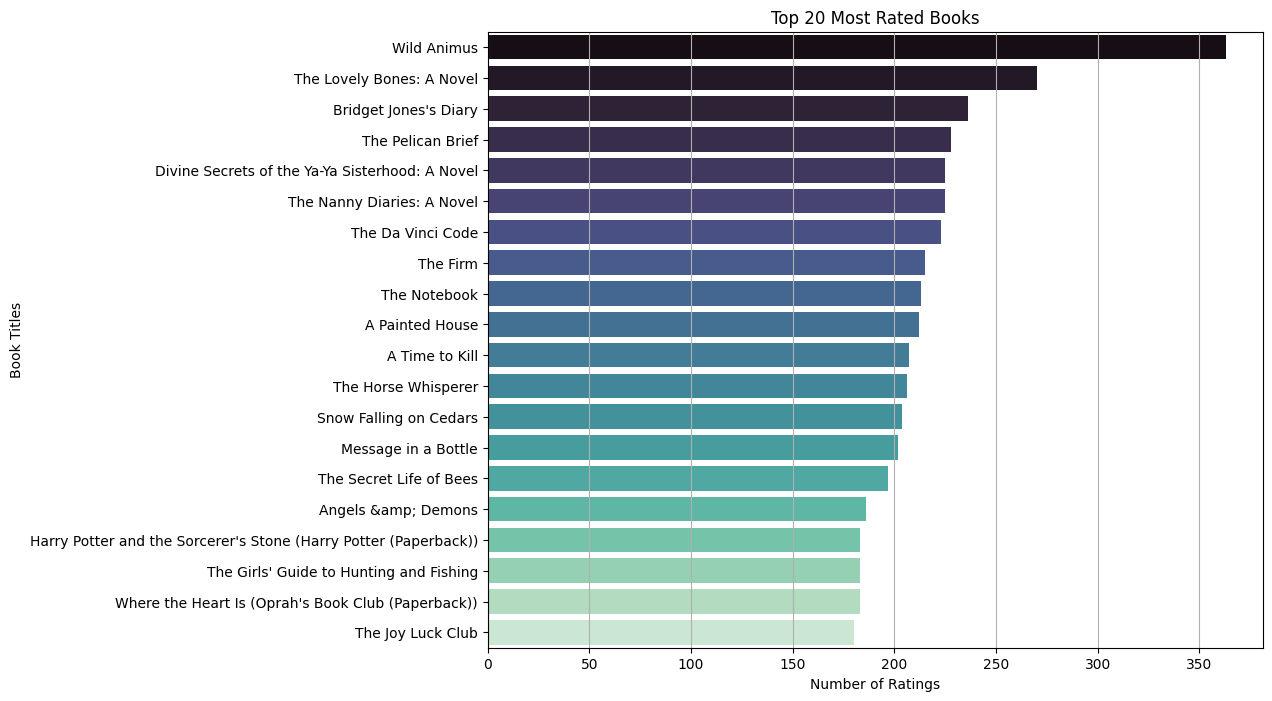

In [111]:
top_books = final_rating['title'].value_counts().head(20)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_books.index, x=top_books.values, palette='mako')
plt.title('Top 20 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Titles')
plt.grid(True, axis='x')
plt.show()


C:\Users\Manamnath tiwari\AppData\Local\Temp\ipykernel_10140\84506371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette='viridis')


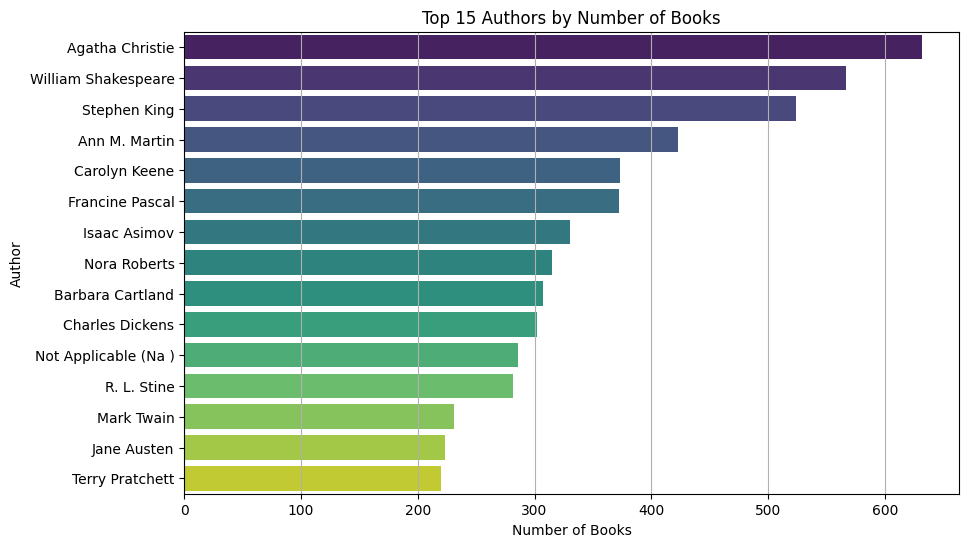

In [112]:
top_authors = books['author'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values, palette='viridis')
plt.title('Top 15 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.grid(True, axis='x')
plt.show()


C:\Users\Manamnath tiwari\AppData\Local\Temp\ipykernel_10140\2824327191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_active_users.index.astype(str), y=most_active_users.values, palette='plasma')


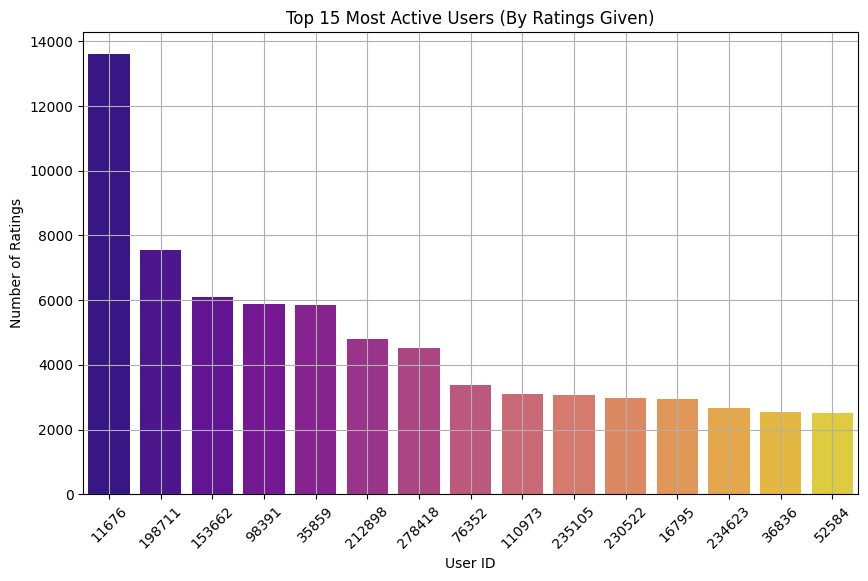

In [114]:
most_active_users = ratings['user_id'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_users.index.astype(str), y=most_active_users.values, palette='plasma')
plt.title('Top 15 Most Active Users (By Ratings Given)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


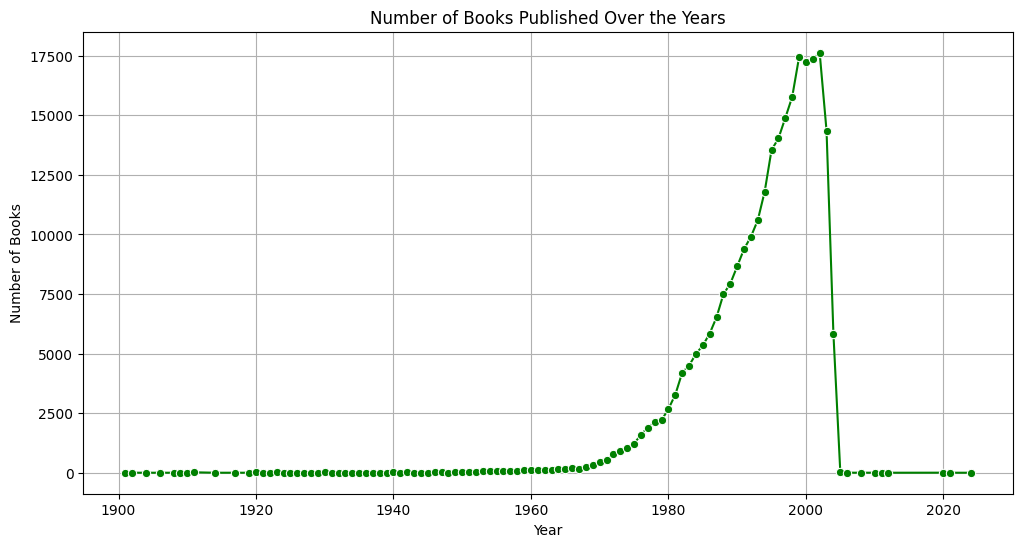

In [115]:
# Clean invalid years
books['year'] = pd.to_numeric(books['year'], errors='coerce')
books = books[(books['year'] > 1900) & (books['year'] < 2025)]

yearly_books = books['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_books.index, y=yearly_books.values, marker='o', color='green')
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()


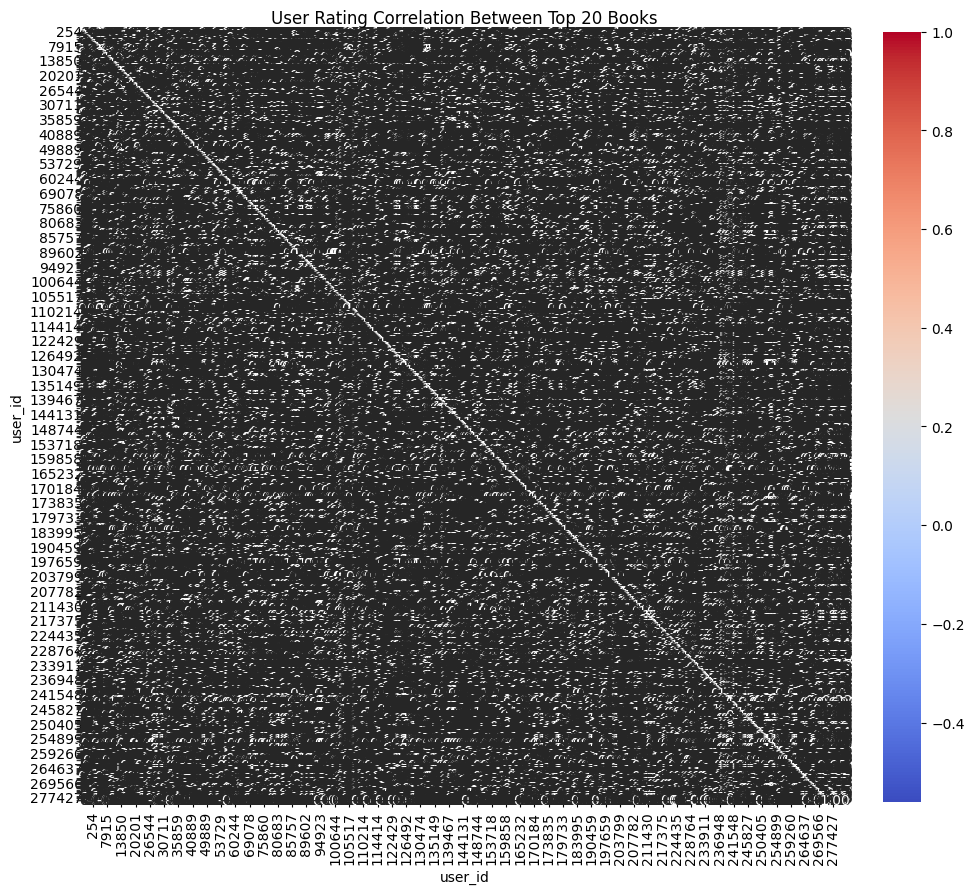

In [116]:
# Sample 20 books with most ratings
sample_books = final_rating['title'].value_counts().head(20).index.tolist()
sample_pivot = book_pivot.loc[sample_books]

plt.figure(figsize=(12, 10))
sns.heatmap(sample_pivot.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('User Rating Correlation Between Top 20 Books')
plt.show()


C:\Users\Manamnath tiwari\AppData\Local\Temp\ipykernel_10140\2406265173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='cubehelix')


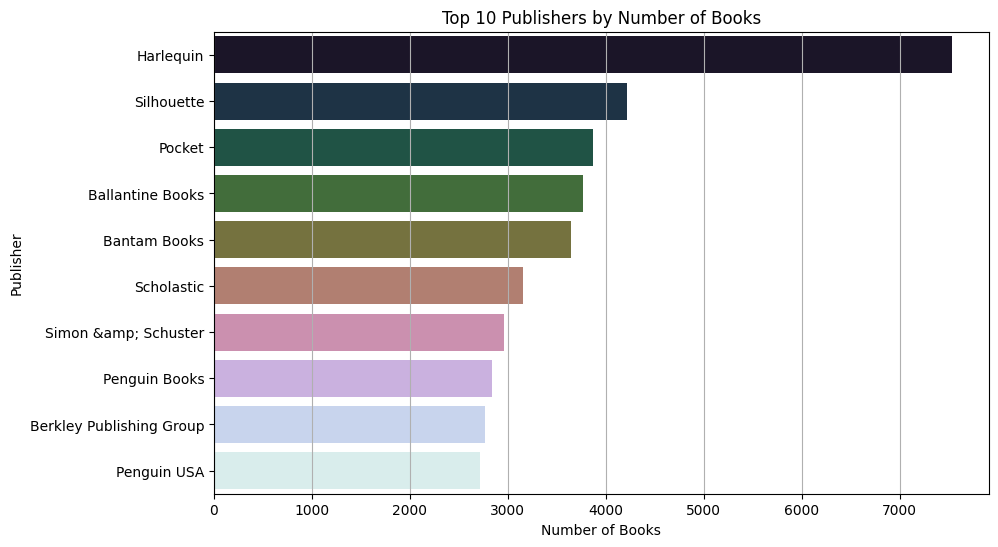

In [117]:
top_publishers = books['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='cubehelix')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.grid(True, axis='x')
plt.show()
